>> Successfully connected to Cassandra
       id_acessos  acesso   ano  codigo_ibge  codigo_nacional  densidade  mes  \
0            4317   27016  2021      2607752               81  94.970299    6   
1           62693     987  2019      2607703               87  22.472700   12   
2           51678    1728  2019      3108107               31  25.160200   12   
3           35262   27054  2020      4201307               47  67.933403   12   
4           54191      46  2019      3145059               38   1.840000   12   
...           ...     ...   ...          ...              ...        ...  ...   
66832       55834    3572  2019      4200309               47  65.565300   12   
66833       40920     253  2020      2209005               89  12.981000   12   
66834       11033     823  2021      1304237               97  16.552700    6   
66835       28249     216  2020      3165602               32  32.383801   12   
66836       56818    6823  2019      3111408               34  83.4008

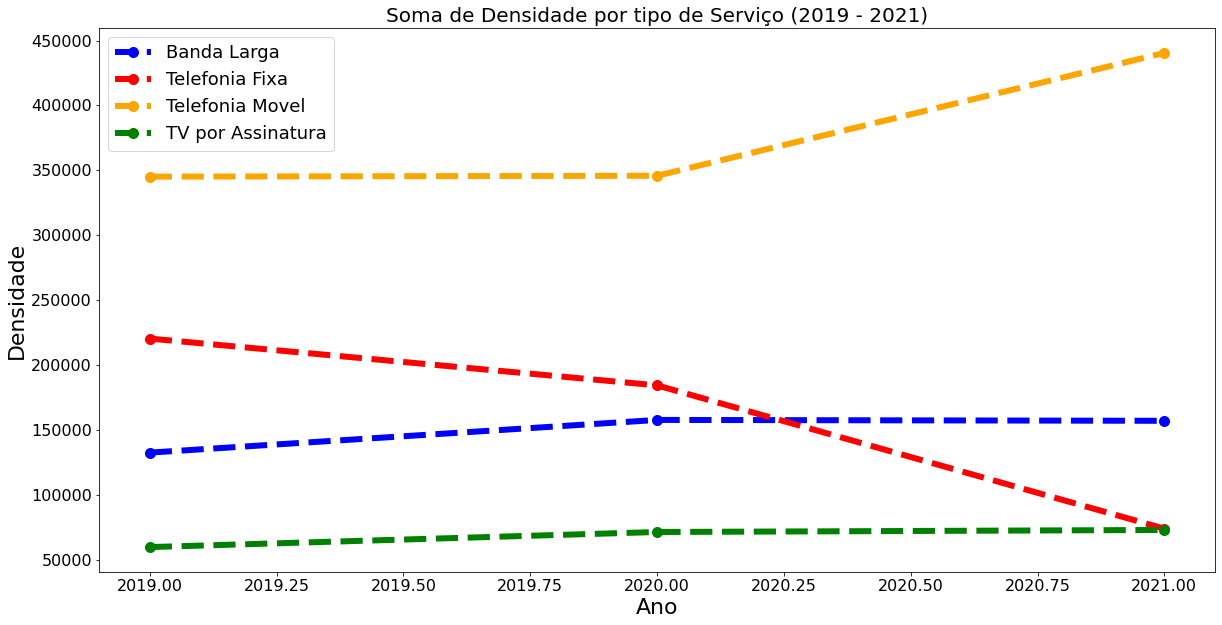

In [1]:
from connector_cassandra import Interface_db_cassandra, get_db_info
from config import CASSANDRA_HOST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Conexao com o Cassandra
cassandra_host = CASSANDRA_HOST
keyspace = get_db_info()
db_cassandra = Interface_db_cassandra(keyspace=keyspace, cassandra_host=cassandra_host)  
print(">> Successfully connected to Cassandra")

# Selecao da tabela municipios_acessos
query = "SELECT * FROM municipios_acessos;"
municipios_acessos = db_cassandra.select(query) 

# Conversao para o DataFrame do Pandas
df_municipios_acessos = pd.DataFrame(municipios_acessos)   
print(df_municipios_acessos)
print(df_municipios_acessos.info())

# Ordenando pela coluna id_acessos
df_municipios_acessos.sort_values(by=['id_acessos'], ascending=False, inplace=True)

# Localiza o servico e salva em uma variavel
banda_larga = df_municipios_acessos.loc[df_municipios_acessos["servico"] == 'Banda Larga Fixa']
telefonia_fixa = df_municipios_acessos.loc[df_municipios_acessos["servico"] == 'Telefonia Fixa']
telefonia_movel = df_municipios_acessos.loc[df_municipios_acessos["servico"] == 'Telefonia Móvel']
tv_por_assinatura = df_municipios_acessos.loc[df_municipios_acessos["servico"] == 'TV por Assinatura'] 

# Agrupa por servico e por ano e faz um novo indice
dataframe_banda_larga = banda_larga.groupby("ano").sum()
dataframe_banda_larga.reset_index(inplace = True)
dataframe_telefonia_fixa = telefonia_fixa.groupby("ano").sum()
dataframe_telefonia_fixa.reset_index(inplace = True)
dataframe_telefonia_movel = telefonia_movel.groupby("ano").sum()
dataframe_telefonia_movel.reset_index(inplace = True)
dataframe_tv_por_assinatura = tv_por_assinatura.groupby("ano").sum()
dataframe_tv_por_assinatura.reset_index(inplace = True)

# Montagem do grafico
plt.figure(figsize=(20,10))
plt.plot(dataframe_banda_larga["ano"], dataframe_banda_larga["densidade"], linestyle='--', marker='o', color = 'blue', markersize = 10,linewidth = 6)
plt.plot(dataframe_telefonia_fixa["ano"], dataframe_telefonia_fixa["densidade"], linestyle='--', marker='o', color = 'red', markersize = 10, linewidth = 6)
plt.plot(dataframe_telefonia_movel["ano"], dataframe_telefonia_movel["densidade"], linestyle='--', marker='o', color = 'orange', markersize = 10, linewidth = 6)
plt.plot(dataframe_tv_por_assinatura["ano"], dataframe_tv_por_assinatura["densidade"], linestyle='--', marker='o', color = 'green', markersize = 10 ,  linewidth = 6)

plt.title("Soma de Densidade por tipo de Serviço (2019 - 2021)", fontsize=20)
plt.xlabel("Ano", fontsize=22)
plt.ylabel("Densidade", fontsize=22)
plt.legend(['Banda Larga', 'Telefonia Fixa', 'Telefonia Movel', 'TV por Assinatura'], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()